In [1]:
from scipy.spatial import ckdtree
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt

In [2]:
l = 1
d = 5e-3*l
epsilon = d*1e-1#1e-2*d

In [3]:
N = 4 #number of vertexes
M = 100 #number of segment adding iteration between adding vertices

In [17]:
def random_vertex():
    x, y = np.random.random(2)*2*l-l
    return np.array([x,y])

def find_segments(vertices, segments):
    active_segments = [] #segmenty które będą się rozrastać
    segments_vertices = [] #krawędzie do których będzie rozrastać się segment na odpowiednim miejscu powyżej
    tree = ckdtree.cKDTree(segments)
    for i in range(len(vertices)):
        dist, nearest_segments = tree.query(vertices[i],5)
        close = [True]
        close.extend((np.diff(dist)<epsilon).tolist())
        for s in nearest_segments[close]:
            active_segments.append(s)
            segments_vertices.append([i])
#             if s in active_segments:
# #                 index = active_segments.index(s)
# #                 segments_vertices[index].extend([i])
#                 active_segments.append(s)
#                 segments_vertices.append([i])
#             else:
#                 active_segments.append(s)
#                 segments_vertices.append([i])
    
    return active_segments, segments_vertices

In [18]:
segments = [(0,0),(0,1)]
active_vertices = []
for n in tqdm(range(N)):
    active_vertices.append(random_vertex())
    active_segments, segments_vertices = find_segments(active_vertices, segments)


#     for m in range(M):
#         if (len(active_segments)-len(segments_vertices)) != 0:
#             print("alarm")
#         for i in range(len(active_segments)):
#             del_x = active_vertices[segments_vertices[i][0]][0] - active_segments[i][0]
#             del_y = active_vertices[segments_vertices[i][0]][1] - active_segments[i][1]
#             r = (del_x**2 + del_y**2)**0.5
#             if r > epsilon:
#                 new_seg = (active_segments[i][0]+del_x*d/r,active_segments[i][1]+del_y*d/r)
#                 segments.append(new_seg)
#                 active_segments[i] = new_seg
#             else:
#                 active_vertices.remove(active_vertices[segments_vertices[i]])
#                 active_segments.remove(active_segments[i])
#                 segments_vertices.remove([i])
        
# np.append(segments,[[0,epsilon]],0)
active_vertices = np.vstack(active_vertices).T
segments = np.vstack(np.array(segments)).T

/home/paulina/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less


In [16]:
type(close)

list

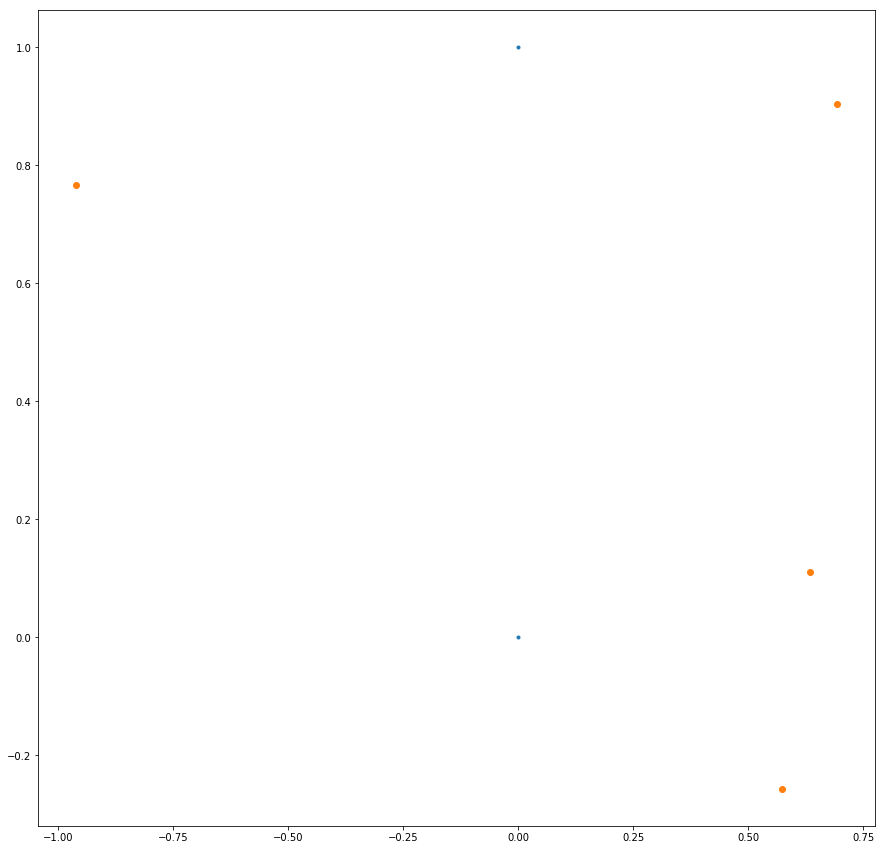

In [19]:
fig = plt.figure(figsize=[15,15])
plt.plot(segments[0],segments[1],'.')
plt.plot(active_vertices[0],active_vertices[1],'o')
# plt.savefig("cos.png")

In [16]:
tup = (2,3)
tup2 = (7,5)
tuptup = [tup,tup2]
tup in tuptup

True